In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
deg = 6
c = 1.5
lam = 0.1

0.1

In [3]:
coeffs_dict = readstring("./results_Anaheim/coeffs_dict_Anaheim.json")
coeffs_dict = JSON.parse(coeffs_dict)

Dict{String,Any} with 1 entry:
  "(6,1.5,0.1,1)" => Any[1.0,0.00571646,-0.0285868,0.0581079,0.0946747,0.024402…

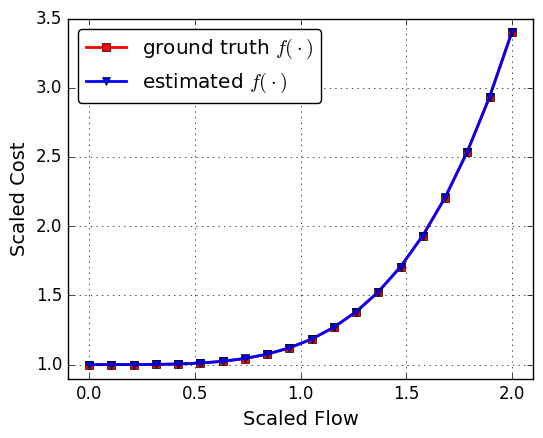

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'rm'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [4]:
using PyPlot

PyPlot.figure(figsize=(6, 4.5))

iterN = 1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict["($deg,$c,$lam,$iterN)"]

xs = linspace(0, 2, 20)
ys_true = map(x->polyEval(true_coeffs, x), xs)

ys = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=2)
PyPlot.plot(xs, ys, "v-b", label=L"estimated $f(\cdot)$", linewidth=2)

legend(loc="upper left", fancybox="true", numpoints=1) 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Anaheim/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")